In [365]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='white', palette='muted')
plt.rcParams['figure.figsize'] = (16,9)

from datetime import datetime, timedelta

## 1. EDA

In [147]:
df = pd.read_csv('../../data/OnlineRetail.csv', encoding= 'unicode_escape')

In [148]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [149]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [151]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [152]:
df['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [283]:
df_de = df[df.Country=='Germany']#Let's use the uk because I live there

<AxesSubplot:>

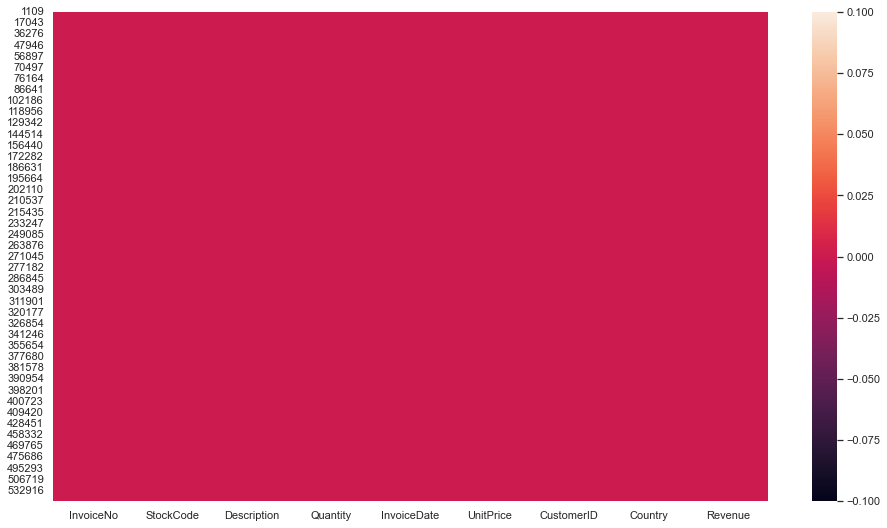

In [284]:
sns.heatmap(df_de.isnull()) #...and luckily no null values!

In [290]:
#copy the original df before doing some changes to it for better visualisations
df_eda = df_de.copy()

In [291]:
df_eda['Revenue'] = df_eda.UnitPrice * df_eda.Quantity

In [292]:
df_eda['Month'] = df_eda['InvoiceDate'].dt.month
df_eda['Year'] = df_eda['InvoiceDate'].dt.year

Text(0.5, 1.0, 'Monthly Revenue 2011')

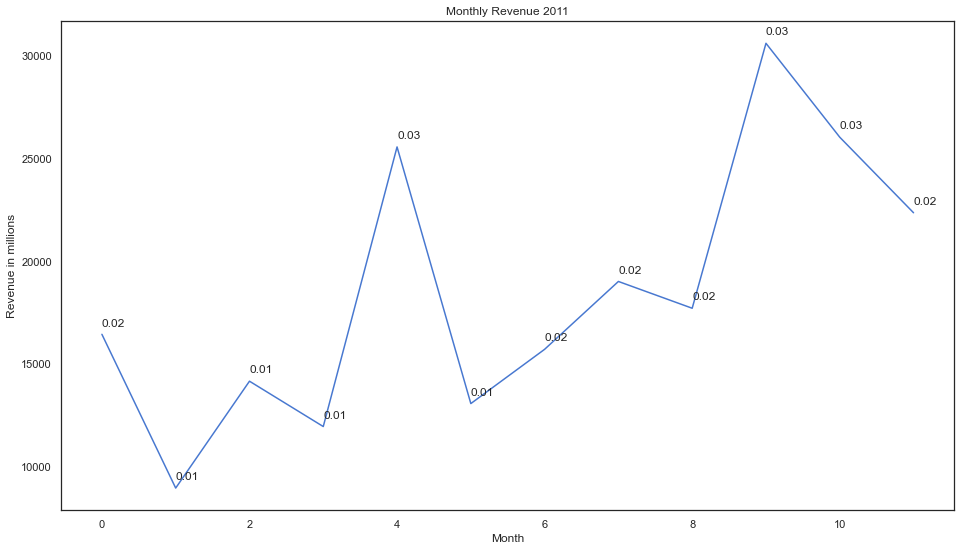

In [293]:
df_eda_rev = df_eda.groupby('Month')['Revenue'].sum().reset_index()
df_eda_rev['Revenue'].plot()
for i,j in df_eda_rev.Revenue.items():
    plt.annotate(str(round((j/1000000),2)), xy=(i, j), textcoords='offset points', xytext=(0, 8))
plt.xlabel('Month')
plt.ylabel('Revenue in millions')
plt.title('Monthly Revenue 2011')

In [294]:
df_eda_rev

,Month,Revenue
0,1,16451.43
1,2,8969.24
2,3,14170.02
3,4,11963.37
4,5,25571.35
5,6,13081.02
6,7,15721.66
7,8,19023.65
8,9,17720.31
9,10,30614.27


Text(0.5, 1.0, 'Monthly growth 2011')

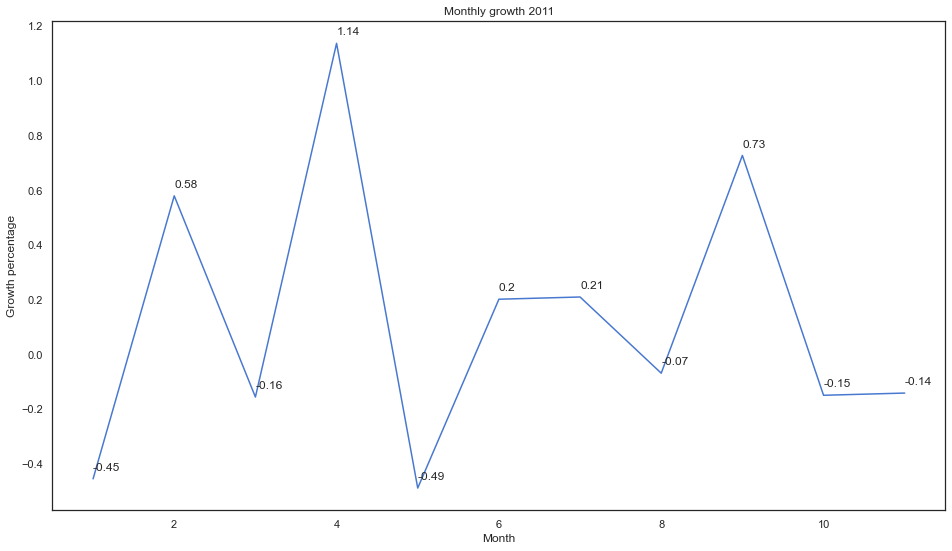

In [295]:

df_eda_rev['Growth'] = df_eda_rev['Revenue'].pct_change()
df_eda_rev['Growth'].plot()
for i,j in df_eda_rev.Growth.items():
    plt.annotate(str(round(j,2)), xy=(i, j), textcoords='offset points', xytext=(0, 8))
plt.xlabel('Month')
plt.ylabel('Growth percentage')
plt.title('Monthly growth 2011')

Text(0.5, 1.0, 'Monthly active customers')

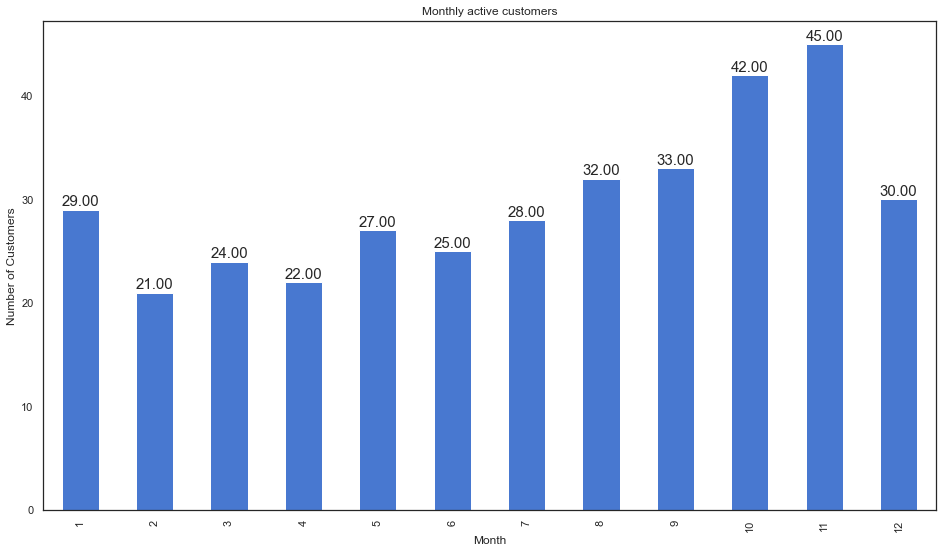

In [296]:
plots = df_eda.groupby('Month')['CustomerID'].nunique().plot(kind='bar')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.ylabel('Number of Customers')
plt.title('Monthly active customers')

In [297]:
#group by CustomerID and month to check whether a customer was active in any given month
df_eda_user_purchase = df_eda.groupby(['CustomerID','Month'])['Revenue'].sum().reset_index()

#create retention matrix with crosstab
df_eda_retention = pd.crosstab(df_eda_user_purchase['CustomerID'], df_eda_user_purchase['Month']).reset_index()

df_eda_retention.head()

Month,CustomerID,1,2,3,4,5,6,7,8,9,10,11,12
0,12426.0,0,0,0,0,1,0,0,0,0,0,0,0
1,12427.0,0,0,0,0,0,0,0,0,0,1,1,1
2,12468.0,1,0,0,0,0,1,1,0,0,0,0,0
3,12471.0,1,1,1,1,1,0,1,1,1,1,1,1
4,12472.0,1,1,1,0,0,1,1,0,0,1,1,1


In [298]:
#create an array of dictionary which keeps Retained & Total User count for each month
months = df_eda_retention.columns[2:]
retention_array = []
for i in range(len(months)-1):
    retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    retention_data['Month'] = int(selected_month)
    retention_data['TotalUsers'] = df_eda_retention[selected_month].sum()
    retention_data['RetainedUsers'] = df_eda_retention[(df_eda_retention[selected_month]>0) & (df_eda_retention[prev_month]>0)][selected_month].sum()
    retention_array.append(retention_data)
    
#convert the array to dataframe and calculate Retention Rate
df_eda_retention = pd.DataFrame(retention_array)
df_eda_retention['RetentionRate'] = df_eda_retention['RetainedUsers']/df_eda_retention['TotalUsers']

Text(0.5, 1.0, 'Customer retention rate per month 2011')

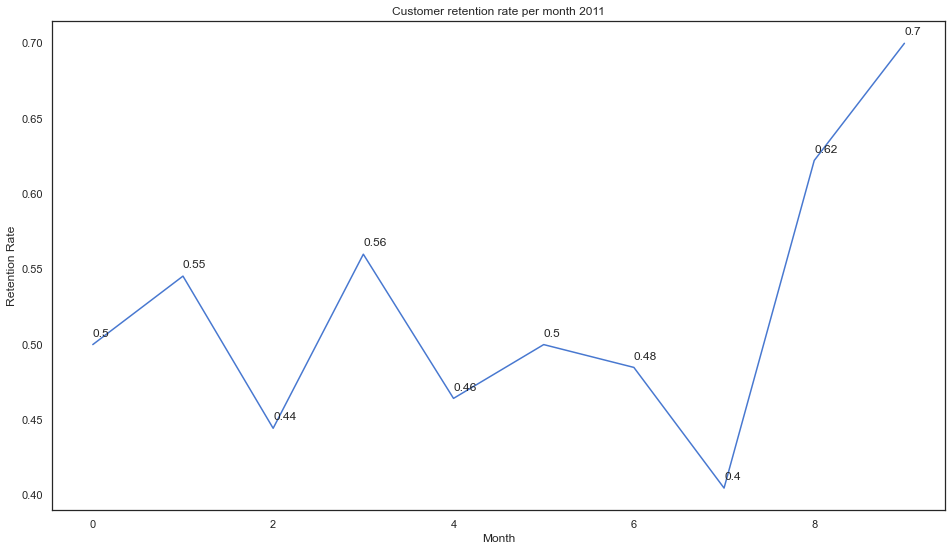

In [299]:
df_eda_retention['RetentionRate'].plot()
for i,j in df_eda_retention.RetentionRate.items():
    plt.annotate(str(round(j,2)), xy=(i, j), textcoords='offset points', xytext=(0, 8))
   
plt.xlabel('Month')
plt.ylabel('Retention Rate')
plt.title('Customer retention rate per month 2011')

## 2. Customer Segmentation using RFM

**2.1 Recency**

In [300]:
df_recency = df_de.groupby(by='CustomerID',
                        as_index=False)['InvoiceDate'].max()

df_recency.columns = ['CustomerID', 'LastPurchaseDate']
recent_date = df_recency['LastPurchaseDate'].max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(
    lambda x: (recent_date - x).days)
df_recency.head()

,CustomerID,LastPurchaseDate,Recency
0,12426.0,2011-05-29 12:26:00,193
1,12427.0,2011-11-28 10:48:00,11
2,12468.0,2011-07-19 13:42:00,142
3,12471.0,2011-12-07 15:43:00,1
4,12472.0,2011-11-09 11:33:00,30


Text(0.5, 1.0, 'Recency of last purchase')

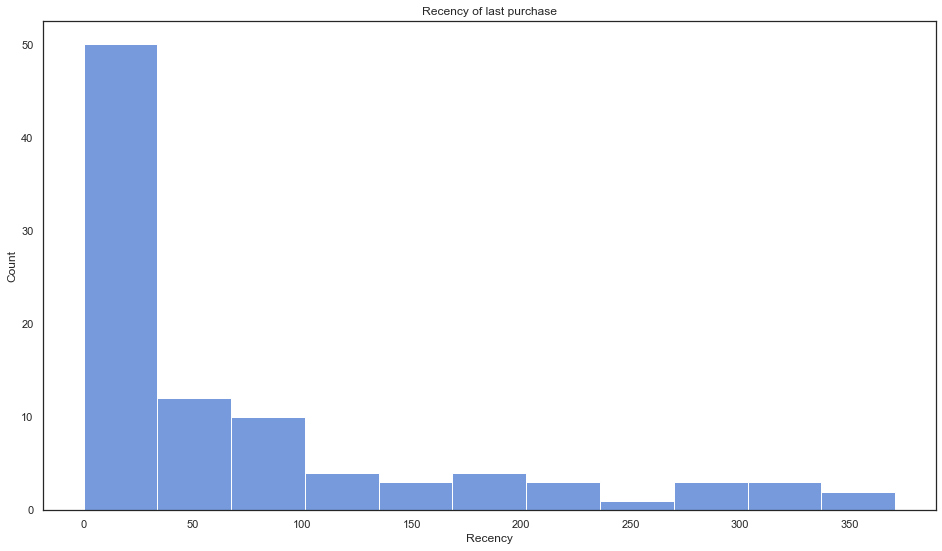

In [301]:
sns.histplot(df_recency['Recency'])
plt.title('Recency of last purchase')

**2.2 Frequency**

In [302]:
df_frequency = df_de.drop_duplicates().groupby(
    by=['CustomerID'], as_index=False)['InvoiceDate'].count()
df_frequency.columns = ['CustomerID', 'Frequency']
df_frequency.head()

,CustomerID,Frequency
0,12426.0,30
1,12427.0,35
2,12468.0,40
3,12471.0,530
4,12472.0,391


Text(0.5, 1.0, 'Frequency of purchases')

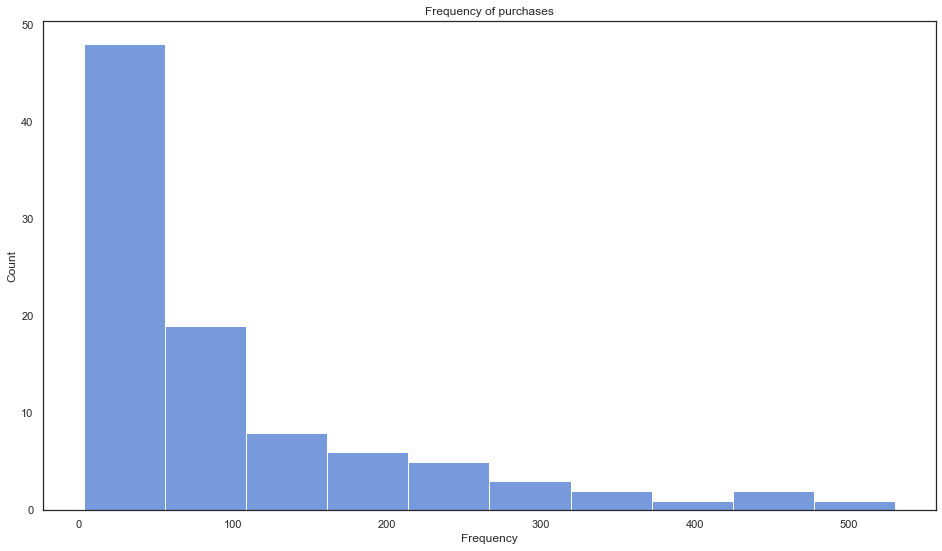

In [303]:
sns.histplot(df_frequency['Frequency'])
plt.title('Frequency of purchases')

**2.3 Monetary**

In [324]:
df_de['Revenue'] = df_de['UnitPrice']*df_de['Quantity']
df_monetary = df_de.groupby(by='CustomerID', as_index=False)['Revenue'].sum()
df_monetary.columns = ['CustomerID', 'Monetary']
df_monetary.head()

,CustomerID,Monetary
0,12426.0,582.73
1,12427.0,708.37
2,12468.0,724.04
3,12471.0,18740.92
4,12472.0,6229.48


Text(0.5, 1.0, 'Revenue')

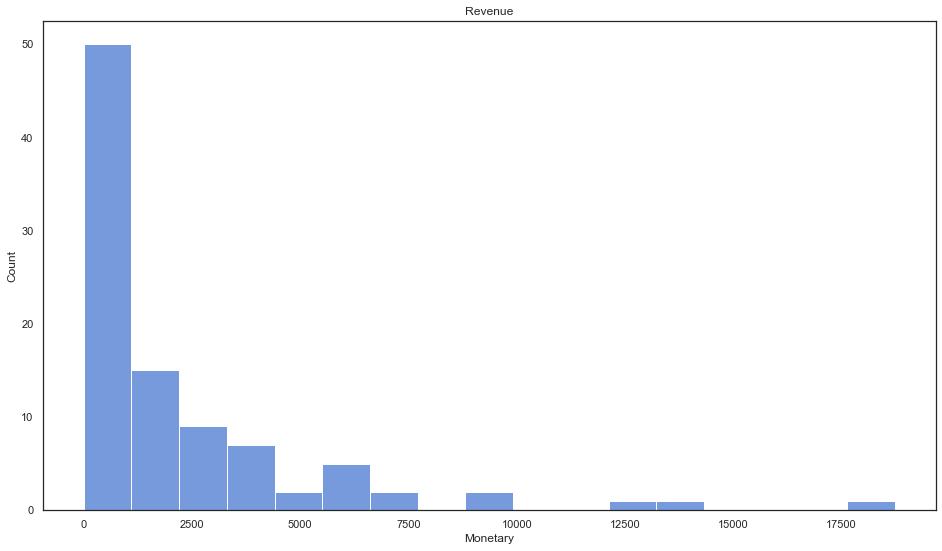

In [325]:
sns.histplot(df_monetary['Monetary'])
plt.title('Revenue')

**2.4 RFM analysis**

In [326]:
rf_df = df_recency.merge(df_frequency, on='CustomerID')
rfm_df = rf_df.merge(df_monetary, on='CustomerID').drop(
    columns='LastPurchaseDate')
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12426.0,193,30,582.73
1,12427.0,11,35,708.37
2,12468.0,142,40,724.04
3,12471.0,1,530,18740.92
4,12472.0,30,391,6229.48


As we only have ~10000 entries, 3 ranks for each dimension should be enough.

In [327]:
rfm_df['RecencyScore'] = pd.qcut(rfm_df['Recency'], 3, labels=[3, 2, 1])

rfm_df['FrequencyScore'] = pd.qcut(rfm_df['Frequency'].rank(method='first'), 3, labels=[1, 2, 3])

rfm_df['MonetaryScore'] = pd.qcut(rfm_df['Monetary'], 3, labels=[1, 2, 3])

rfm_df['RFMScore']=rfm_df['RecencyScore'].astype(int)+rfm_df['FrequencyScore'].astype(int)+rfm_df['MonetaryScore'].astype(int)
rfm_df.head()


,CustomerID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFMScore
0,12426.0,193,30,582.73,1,1,1,3
1,12427.0,11,35,708.37,3,2,2,7
2,12468.0,142,40,724.04,1,2,2,5
3,12471.0,1,530,18740.92,3,3,3,9
4,12472.0,30,391,6229.48,2,3,3,8


In [328]:
rfm_df.RFMScore.max()

9

In [329]:
def rfm_level(score):
    if  ((score >1) and (score < 5)):
        return 'LowValue'
    elif ((score >4) and (score < 8)):
        return 'MediumValue'
    else:
        return 'HighValue'

In [330]:
rfm_df['Level'] = rfm_df['RFMScore'].apply(lambda score : rfm_level(score))
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFMScore,Level
0,12426.0,193,30,582.73,1,1,1,3,LowValue
1,12427.0,11,35,708.37,3,2,2,7,MediumValue
2,12468.0,142,40,724.04,1,2,2,5,MediumValue
3,12471.0,1,530,18740.92,3,3,3,9,HighValue
4,12472.0,30,391,6229.48,2,3,3,8,HighValue


<AxesSubplot:xlabel='Level', ylabel='count'>

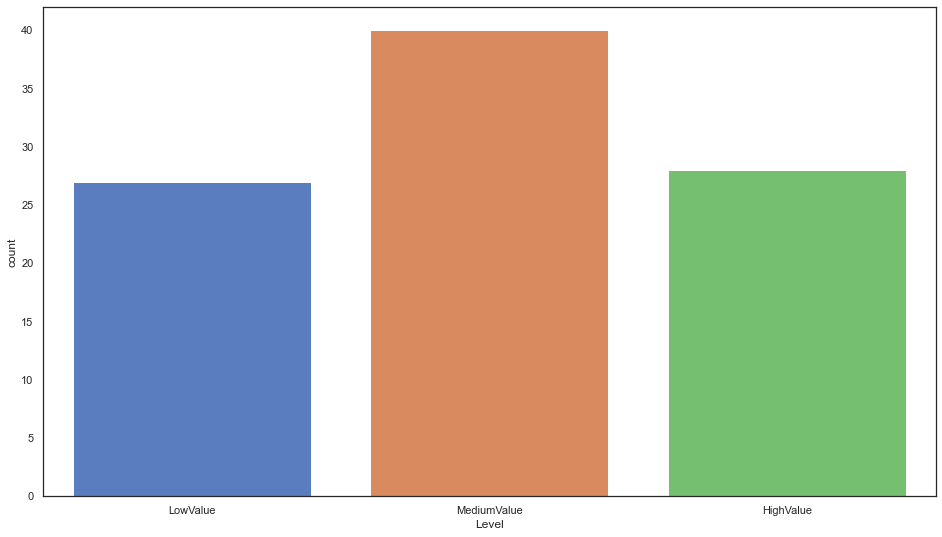

In [331]:
sns.countplot(x=rfm_df['Level'])

<AxesSubplot:xlabel='Frequency', ylabel='Recency'>

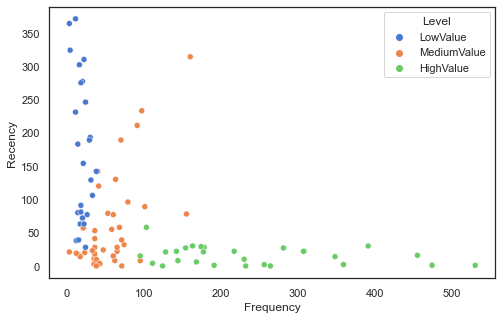

In [332]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=rfm_df, x='Frequency', y='Recency', hue='Level')

<AxesSubplot:xlabel='Recency', ylabel='Monetary'>

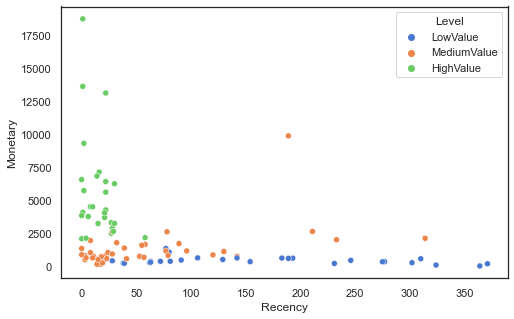

In [333]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=rfm_df, x='Recency', y='Monetary', hue='Level')

<AxesSubplot:xlabel='Frequency', ylabel='Monetary'>

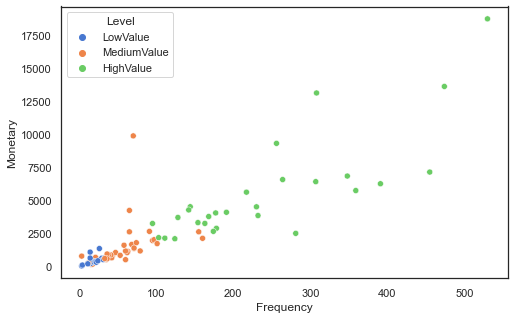

In [334]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=rfm_df, x='Frequency', y='Monetary', hue='Level')

## 3. Conclusion of Customer segmentation

Using RFM analysis, we could identify three customer segements in our German market. We could have used K-Means to identify those but simple quartiles got us to the goal as well. These segments could now be used e.g. for targeted campaigns.